In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

37


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:487
number of class2:1130

 ****** Running generation 0 ****** 

Population's average fitness: 0.54871 stdev: 0.14239
Best fitness: 0.77489 - size: (2, 13) - species 4 - id 197
Average adjusted fitness: 0.290
Mean genetic distance 2.815, standard deviation 0.463
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 18.608 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63396 stdev: 0.11653
Best fitness: 0.81571 - size: (3, 15) - species 4 - id 359
Average adjusted fitness: 0.330
Mean genetic distance 2.930, standard deviation 0.460
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.865 sec (19.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66269 stdev: 0.10708
Best fitness: 0.81571 - size: (3, 15) - species 4 - id 359
Average adjusted fitness: 0.372
Mean genetic distance 2.963, standard deviation 0.481
Population of 199 members in 27 species
Total extin

Population's average fitness: 0.63888 stdev: 0.11047
Best fitness: 0.83859 - size: (4, 17) - species 25 - id 1493
Average adjusted fitness: 0.322
Mean genetic distance 3.216, standard deviation 0.508
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 31.537 sec (26.177 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64160 stdev: 0.11549
Best fitness: 0.84601 - size: (4, 18) - species 25 - id 1624
Average adjusted fitness: 0.272
Mean genetic distance 3.193, standard deviation 0.503
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 29.151 sec (27.102 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63841 stdev: 0.12117
Best fitness: 0.85467 - size: (4, 15) - species 25 - id 1751
Average adjusted fitness: 0.265
Mean genetic distance 3.199, standard deviation 0.491
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 27.798 sec (27.678 average)

 

Population's average fitness: 0.62071 stdev: 0.12362
Best fitness: 0.76129 - size: (3, 15) - species 6 - id 271
Average adjusted fitness: 0.317
Mean genetic distance 3.064, standard deviation 0.515
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 23.387 sec (22.057 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63692 stdev: 0.12116
Best fitness: 0.78169 - size: (6, 21) - species 31 - id 848
Average adjusted fitness: 0.334
Mean genetic distance 3.155, standard deviation 0.516
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 35.750 sec (24.795 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63486 stdev: 0.12344
Best fitness: 0.78169 - size: (6, 21) - species 31 - id 848
Average adjusted fitness: 0.367
Mean genetic distance 3.182, standard deviation 0.526
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 33.339 sec (26.219 average)

 ******

Population's average fitness: 0.64664 stdev: 0.09238
Best fitness: 0.81571 - size: (5, 21) - species 24 - id 1992
Average adjusted fitness: 0.257
Mean genetic distance 3.059, standard deviation 0.487
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 22.705 sec (20.660 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65085 stdev: 0.09079
Best fitness: 0.81571 - size: (5, 21) - species 24 - id 1992
Average adjusted fitness: 0.290
Mean genetic distance 3.074, standard deviation 0.493
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 21.350 sec (20.920 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64532 stdev: 0.10193
Best fitness: 0.81571 - size: (5, 21) - species 24 - id 1992
Average adjusted fitness: 0.313
Mean genetic distance 3.094, standard deviation 0.489
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 23.036 sec (21.266 average)
nu

Population's average fitness: 0.66160 stdev: 0.12460
Best fitness: 0.82993 - size: (5, 18) - species 2 - id 937
Average adjusted fitness: 0.390
Mean genetic distance 3.099, standard deviation 0.473
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.007 sec (19.467 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67656 stdev: 0.11052
Best fitness: 0.82993 - size: (5, 18) - species 2 - id 937
Average adjusted fitness: 0.369
Mean genetic distance 3.101, standard deviation 0.473
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 20.998 sec (19.659 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68641 stdev: 0.10787
Best fitness: 0.82993 - size: (5, 18) - species 2 - id 937
Average adjusted fitness: 0.402
Mean genetic distance 3.143, standard deviation 0.476
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 21.791 sec (19.896 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.50123 stdev: 0.05947
Best fitness: 0.70625 - size: (2, 13) - species 3 - id 81
Average adjusted fitness: 0.212
Mean genetic distance 2.873, standard deviation 0.478
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.756 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52345 stdev: 0.06219
Best fitness: 0.75943 - size: (3, 15) - species 21 - id 374
Average adjusted fitness: 0.173
Mean genetic distance 2.966, standard deviation 0.472
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.417 sec (18.086 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53759 stdev: 0.06655
Best fitness: 0.75943 - size: (3, 15) - species 21 - id 374
Average adjusted fitness: 0.134
Mean genetic distance 3.047, standard deviation 0.505
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 18.888 sec (18.

Population's average fitness: 0.64780 stdev: 0.12835
Best fitness: 0.80334 - size: (5, 20) - species 35 - id 1496
Average adjusted fitness: 0.349
Mean genetic distance 3.211, standard deviation 0.496
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 22.266 sec (20.473 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67340 stdev: 0.10404
Best fitness: 0.80334 - size: (5, 20) - species 35 - id 1496
Average adjusted fitness: 0.378
Mean genetic distance 3.194, standard deviation 0.487
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 21.444 sec (20.915 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66061 stdev: 0.12644
Best fitness: 0.80334 - size: (5, 20) - species 35 - id 1496
Average adjusted fitness: 0.380
Mean genetic distance 3.183, standard deviation 0.493
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 22.101 sec (21.279 average)

 

Population's average fitness: 0.72783 stdev: 0.14838
Best fitness: 0.86704 - size: (4, 15) - species 11 - id 531
Average adjusted fitness: 0.513
Mean genetic distance 3.099, standard deviation 0.497
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 19.585 sec (18.312 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.71541 stdev: 0.17317
Best fitness: 0.86704 - size: (4, 15) - species 11 - id 531
Average adjusted fitness: 0.498
Mean genetic distance 3.091, standard deviation 0.533
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.180 sec (18.886 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.73482 stdev: 0.15682
Best fitness: 0.86704 - size: (4, 15) - species 11 - id 531
Average adjusted fitness: 0.517
Mean genetic distance 3.112, standard deviation 0.519
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 20.474 sec (19.151 average)

 *****

Population's average fitness: 0.60506 stdev: 0.07470
Best fitness: 0.74521 - size: (4, 14) - species 3 - id 1791
Average adjusted fitness: 0.211
Mean genetic distance 3.170, standard deviation 0.486
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 23.513 sec (21.728 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59775 stdev: 0.08722
Best fitness: 0.74521 - size: (4, 14) - species 3 - id 1791
Average adjusted fitness: 0.313
Mean genetic distance 3.198, standard deviation 0.476
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 23.183 sec (22.089 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59764 stdev: 0.08412
Best fitness: 0.74521 - size: (4, 14) - species 3 - id 1791
Average adjusted fitness: 0.223
Mean genetic distance 3.220, standard deviation 0.486
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 22.884 sec (22.330 average)
numbe

Population's average fitness: 0.58503 stdev: 0.08223
Best fitness: 0.73779 - size: (2, 13) - species 5 - id 72
Average adjusted fitness: 0.227
Mean genetic distance 3.096, standard deviation 0.519
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 20.855 sec (19.334 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59868 stdev: 0.07914
Best fitness: 0.73779 - size: (2, 13) - species 5 - id 72
Average adjusted fitness: 0.247
Mean genetic distance 3.077, standard deviation 0.512
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 21.413 sec (19.594 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60898 stdev: 0.06632
Best fitness: 0.73779 - size: (2, 13) - species 5 - id 72
Average adjusted fitness: 0.205
Mean genetic distance 3.087, standard deviation 0.507
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 21.316 sec (19.785 average)

 ****** Runn


 ****** Running generation 0 ****** 

Population's average fitness: 0.49436 stdev: 0.05384
Best fitness: 0.65615 - size: (2, 13) - species 2 - id 100
Average adjusted fitness: 0.179
Mean genetic distance 2.861, standard deviation 0.474
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.085 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52974 stdev: 0.05714
Best fitness: 0.68584 - size: (2, 14) - species 14 - id 349
Average adjusted fitness: 0.199
Mean genetic distance 3.007, standard deviation 0.480
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.257 sec (17.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54806 stdev: 0.06602
Best fitness: 0.71367 - size: (3, 15) - species 3 - id 526
Average adjusted fitness: 0.176
Mean genetic distance 2.982, standard deviation 0.466
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.318 sec (18.

Population's average fitness: 0.77011 stdev: 0.23587
Best fitness: 0.95424 - size: (4, 17) - species 6 - id 547
Average adjusted fitness: 0.632
Mean genetic distance 3.053, standard deviation 0.468
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 21.675 sec (20.298 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.78308 stdev: 0.21635
Best fitness: 0.95424 - size: (4, 17) - species 6 - id 547
Average adjusted fitness: 0.640
Mean genetic distance 3.072, standard deviation 0.463
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 20.654 sec (20.654 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.77345 stdev: 0.22426
Best fitness: 0.95424 - size: (4, 17) - species 6 - id 547
Average adjusted fitness: 0.634
Mean genetic distance 3.054, standard deviation 0.463
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 21.606 sec (20.986 average)

 ******

Population's average fitness: 0.64141 stdev: 0.11544
Best fitness: 0.77180 - size: (3, 15) - species 13 - id 497
Average adjusted fitness: 0.344
Mean genetic distance 2.946, standard deviation 0.472
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 19.705 sec (18.404 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64475 stdev: 0.11176
Best fitness: 0.77922 - size: (5, 17) - species 7 - id 792
Average adjusted fitness: 0.360
Mean genetic distance 2.953, standard deviation 0.471
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 19.959 sec (18.715 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65613 stdev: 0.11960
Best fitness: 0.81571 - size: (5, 20) - species 13 - id 1004
Average adjusted fitness: 0.352
Mean genetic distance 3.000, standard deviation 0.492
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 20.199 sec (18.962 average)

 *****

Population's average fitness: 0.61768 stdev: 0.08269
Best fitness: 0.78108 - size: (8, 24) - species 7 - id 1515
Average adjusted fitness: 0.262
Mean genetic distance 3.213, standard deviation 0.513
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 22.218 sec (21.349 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61240 stdev: 0.09809
Best fitness: 0.78850 - size: (8, 23) - species 7 - id 2050
Average adjusted fitness: 0.305
Mean genetic distance 3.203, standard deviation 0.510
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.070 sec (21.596 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61291 stdev: 0.09508
Best fitness: 0.78850 - size: (8, 23) - species 7 - id 2050
Average adjusted fitness: 0.289
Mean genetic distance 3.220, standard deviation 0.507
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.079 sec (21.734 average)
numbe

Population's average fitness: 0.70103 stdev: 0.17705
Best fitness: 0.83426 - size: (4, 16) - species 12 - id 957
Average adjusted fitness: 0.482
Mean genetic distance 3.099, standard deviation 0.491
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.489 sec (19.644 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71933 stdev: 0.15365
Best fitness: 0.84106 - size: (5, 20) - species 24 - id 1229
Average adjusted fitness: 0.500
Mean genetic distance 3.070, standard deviation 0.506
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.229 sec (19.842 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71418 stdev: 0.17014
Best fitness: 0.84601 - size: (6, 20) - species 22 - id 1348
Average adjusted fitness: 0.498
Mean genetic distance 3.067, standard deviation 0.495
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 21.454 sec (20.021 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.52811 stdev: 0.08293
Best fitness: 0.66790 - size: (2, 13) - species 7 - id 97
Average adjusted fitness: 0.206
Mean genetic distance 2.954, standard deviation 0.481
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.293 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55607 stdev: 0.08147
Best fitness: 0.67223 - size: (3, 14) - species 6 - id 254
Average adjusted fitness: 0.198
Mean genetic distance 3.032, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.302 sec (17.798 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56914 stdev: 0.07239
Best fitness: 0.69264 - size: (3, 13) - species 6 - id 530
Average adjusted fitness: 0.219
Mean genetic distance 3.101, standard deviation 0.517
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 19.813 sec (18.47

Population's average fitness: 0.64628 stdev: 0.12170
Best fitness: 0.77984 - size: (4, 16) - species 16 - id 1215
Average adjusted fitness: 0.370
Mean genetic distance 3.122, standard deviation 0.494
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.070 sec (20.279 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65801 stdev: 0.10501
Best fitness: 0.77984 - size: (4, 16) - species 16 - id 1215
Average adjusted fitness: 0.347
Mean genetic distance 3.137, standard deviation 0.511
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 22.444 sec (20.814 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63943 stdev: 0.12644
Best fitness: 0.77984 - size: (4, 16) - species 16 - id 1215
Average adjusted fitness: 0.335
Mean genetic distance 3.113, standard deviation 0.502
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 22.013 sec (21.164 average)

 

Population's average fitness: 0.66646 stdev: 0.10810
Best fitness: 0.82189 - size: (4, 18) - species 2 - id 676
Average adjusted fitness: 0.382
Mean genetic distance 2.973, standard deviation 0.486
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.358 sec (18.465 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68563 stdev: 0.09041
Best fitness: 0.82622 - size: (4, 17) - species 20 - id 828
Average adjusted fitness: 0.379
Mean genetic distance 3.062, standard deviation 0.481
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.940 sec (18.960 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67643 stdev: 0.10736
Best fitness: 0.82622 - size: (4, 17) - species 20 - id 828
Average adjusted fitness: 0.379
Mean genetic distance 3.093, standard deviation 0.479
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 20.877 sec (19.280 average)

 ******

Population's average fitness: 0.67717 stdev: 0.13393
Best fitness: 0.83550 - size: (5, 17) - species 32 - id 903
Average adjusted fitness: 0.401
Mean genetic distance 3.157, standard deviation 0.469
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 23.638 sec (22.118 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68011 stdev: 0.12644
Best fitness: 0.84230 - size: (6, 17) - species 32 - id 1957
Average adjusted fitness: 0.402
Mean genetic distance 3.137, standard deviation 0.462
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 23.091 sec (22.394 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67736 stdev: 0.13148
Best fitness: 0.84230 - size: (6, 17) - species 32 - id 1957
Average adjusted fitness: 0.373
Mean genetic distance 3.145, standard deviation 0.461
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 24.206 sec (22.768 average)
num

Population's average fitness: 0.65771 stdev: 0.12937
Best fitness: 0.83797 - size: (4, 18) - species 16 - id 1018
Average adjusted fitness: 0.433
Mean genetic distance 3.084, standard deviation 0.476
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 20.494 sec (19.523 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67620 stdev: 0.11120
Best fitness: 0.83797 - size: (4, 18) - species 16 - id 1018
Average adjusted fitness: 0.376
Mean genetic distance 3.084, standard deviation 0.464
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 21.376 sec (19.754 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66528 stdev: 0.13129
Best fitness: 0.83797 - size: (4, 18) - species 30 - id 1018
Average adjusted fitness: 0.390
Mean genetic distance 3.098, standard deviation 0.460
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 21.042 sec (19.897 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.55447 stdev: 0.13805
Best fitness: 0.78355 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.262
Mean genetic distance 2.896, standard deviation 0.468
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.122 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63691 stdev: 0.11628
Best fitness: 0.78355 - size: (2, 13) - species 6 - id 63
Average adjusted fitness: 0.356
Mean genetic distance 3.017, standard deviation 0.498
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.149 sec (17.635 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63288 stdev: 0.12558
Best fitness: 0.78602 - size: (4, 18) - species 27 - id 511
Average adjusted fitness: 0.329
Mean genetic distance 3.047, standard deviation 0.480
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 19.151 sec (18.14

Population's average fitness: 0.61721 stdev: 0.10247
Best fitness: 0.84848 - size: (4, 18) - species 1 - id 1208
Average adjusted fitness: 0.332
Mean genetic distance 3.262, standard deviation 0.469
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 23.372 sec (20.779 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62572 stdev: 0.10319
Best fitness: 0.84848 - size: (4, 18) - species 1 - id 1208
Average adjusted fitness: 0.257
Mean genetic distance 3.264, standard deviation 0.473
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 23.300 sec (21.355 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62620 stdev: 0.10430
Best fitness: 0.84848 - size: (4, 18) - species 1 - id 1208
Average adjusted fitness: 0.296
Mean genetic distance 3.277, standard deviation 0.478
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 21.923 sec (21.716 average)

 ***

Population's average fitness: 0.57610 stdev: 0.09167
Best fitness: 0.76933 - size: (3, 15) - species 7 - id 659
Average adjusted fitness: 0.293
Mean genetic distance 3.122, standard deviation 0.486
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 19.668 sec (18.558 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58664 stdev: 0.09629
Best fitness: 0.76933 - size: (3, 15) - species 19 - id 659
Average adjusted fitness: 0.239
Mean genetic distance 3.112, standard deviation 0.495
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 20.406 sec (18.927 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59431 stdev: 0.09546
Best fitness: 0.76933 - size: (3, 15) - species 41 - id 659
Average adjusted fitness: 0.261
Mean genetic distance 3.117, standard deviation 0.468
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 21.012 sec (19.275 average)

 ******

Population's average fitness: 0.60926 stdev: 0.07061
Best fitness: 0.74335 - size: (3, 15) - species 4 - id 1843
Average adjusted fitness: 0.163
Mean genetic distance 3.151, standard deviation 0.508
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.319 sec (21.699 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60507 stdev: 0.07441
Best fitness: 0.74335 - size: (3, 15) - species 4 - id 1843
Average adjusted fitness: 0.179
Mean genetic distance 3.147, standard deviation 0.499
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 23.128 sec (22.048 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61047 stdev: 0.06883
Best fitness: 0.74335 - size: (3, 15) - species 4 - id 1843
Average adjusted fitness: 0.199
Mean genetic distance 3.141, standard deviation 0.506
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 23.868 sec (22.385 average)
numbe

Population's average fitness: 0.60624 stdev: 0.07081
Best fitness: 0.74088 - size: (4, 20) - species 9 - id 904
Average adjusted fitness: 0.222
Mean genetic distance 3.145, standard deviation 0.446
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 22.337 sec (20.023 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60783 stdev: 0.07593
Best fitness: 0.74088 - size: (4, 20) - species 9 - id 904
Average adjusted fitness: 0.273
Mean genetic distance 3.150, standard deviation 0.444
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 22.532 sec (20.337 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60589 stdev: 0.08090
Best fitness: 0.74088 - size: (4, 20) - species 9 - id 904
Average adjusted fitness: 0.283
Mean genetic distance 3.166, standard deviation 0.459
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 23.076 sec (20.641 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.55547 stdev: 0.20391
Best fitness: 0.86518 - size: (2, 13) - species 6 - id 125
Average adjusted fitness: 0.412
Mean genetic distance 2.943, standard deviation 0.486
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.175 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68778 stdev: 0.15767
Best fitness: 0.86518 - size: (2, 13) - species 7 - id 125
Average adjusted fitness: 0.500
Mean genetic distance 2.968, standard deviation 0.476
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 18.198 sec (17.686 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70930 stdev: 0.15413
Best fitness: 0.86518 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.490
Mean genetic distance 3.013, standard deviation 0.513
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 18.865 sec (18.0

Population's average fitness: 0.60862 stdev: 0.10376
Best fitness: 0.78417 - size: (4, 15) - species 3 - id 828
Average adjusted fitness: 0.306
Mean genetic distance 3.181, standard deviation 0.505
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 22.633 sec (20.799 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61581 stdev: 0.10160
Best fitness: 0.78417 - size: (4, 15) - species 3 - id 828
Average adjusted fitness: 0.314
Mean genetic distance 3.170, standard deviation 0.508
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.111 sec (21.297 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63461 stdev: 0.10001
Best fitness: 0.78417 - size: (6, 22) - species 8 - id 1785
Average adjusted fitness: 0.328
Mean genetic distance 3.199, standard deviation 0.498
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 22.935 sec (21.741 average)

 *****

Population's average fitness: 0.62605 stdev: 0.13308
Best fitness: 0.78046 - size: (3, 16) - species 4 - id 660
Average adjusted fitness: 0.338
Mean genetic distance 3.080, standard deviation 0.448
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 20.246 sec (18.830 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63631 stdev: 0.11989
Best fitness: 0.78046 - size: (3, 16) - species 4 - id 660
Average adjusted fitness: 0.316
Mean genetic distance 3.099, standard deviation 0.468
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 21.517 sec (19.368 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64270 stdev: 0.12352
Best fitness: 0.78046 - size: (4, 17) - species 29 - id 948
Average adjusted fitness: 0.316
Mean genetic distance 3.109, standard deviation 0.466
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 22.220 sec (19.843 average)

 ****** 

Population's average fitness: 0.60927 stdev: 0.08622
Best fitness: 0.73408 - size: (5, 19) - species 1 - id 2000
Average adjusted fitness: 0.223
Mean genetic distance 3.150, standard deviation 0.481
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 22.205 sec (21.657 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61322 stdev: 0.08022
Best fitness: 0.73408 - size: (5, 19) - species 1 - id 2000
Average adjusted fitness: 0.246
Mean genetic distance 3.146, standard deviation 0.483
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 23.220 sec (21.941 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62728 stdev: 0.06385
Best fitness: 0.74644 - size: (8, 28) - species 13 - id 2280
Average adjusted fitness: 0.223
Mean genetic distance 3.177, standard deviation 0.481
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 23.651 sec (22.206 average)
numb

Population's average fitness: 0.62832 stdev: 0.12489
Best fitness: 0.76190 - size: (3, 15) - species 5 - id 231
Average adjusted fitness: 0.334
Mean genetic distance 3.050, standard deviation 0.486
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 20.563 sec (19.712 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62915 stdev: 0.13478
Best fitness: 0.76190 - size: (3, 15) - species 5 - id 231
Average adjusted fitness: 0.343
Mean genetic distance 3.103, standard deviation 0.485
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 20.355 sec (19.793 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63398 stdev: 0.12839
Best fitness: 0.76252 - size: (4, 17) - species 5 - id 1404
Average adjusted fitness: 0.337
Mean genetic distance 3.103, standard deviation 0.475
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 20.979 sec (19.925 average)

 ****** 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46727 stdev: 0.15240
Best fitness: 0.77056 - size: (2, 13) - species 5 - id 88
Average adjusted fitness: 0.206
Mean genetic distance 2.835, standard deviation 0.459
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 17.897 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56744 stdev: 0.15296
Best fitness: 0.77242 - size: (3, 15) - species 6 - id 322
Average adjusted fitness: 0.290
Mean genetic distance 2.907, standard deviation 0.462
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.510 sec (18.204 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60774 stdev: 0.14015
Best fitness: 0.78046 - size: (2, 14) - species 1 - id 518
Average adjusted fitness: 0.299
Mean genetic distance 3.009, standard deviation 0.479
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 18.990 sec (18.46

Population's average fitness: 0.61948 stdev: 0.09266
Best fitness: 0.77118 - size: (2, 14) - species 20 - id 1452
Average adjusted fitness: 0.314
Mean genetic distance 3.112, standard deviation 0.474
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 21.056 sec (20.357 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62009 stdev: 0.08735
Best fitness: 0.77118 - size: (2, 14) - species 20 - id 1452
Average adjusted fitness: 0.230
Mean genetic distance 3.120, standard deviation 0.472
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 21.652 sec (20.747 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62683 stdev: 0.08775
Best fitness: 0.77118 - size: (2, 14) - species 20 - id 1452
Average adjusted fitness: 0.308
Mean genetic distance 3.158, standard deviation 0.474
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 22.795 sec (21.131 average)

 

Population's average fitness: 0.60165 stdev: 0.14630
Best fitness: 0.81756 - size: (3, 15) - species 13 - id 337
Average adjusted fitness: 0.381
Mean genetic distance 3.006, standard deviation 0.493
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 20.086 sec (18.657 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63051 stdev: 0.13436
Best fitness: 0.85281 - size: (4, 15) - species 13 - id 845
Average adjusted fitness: 0.320
Mean genetic distance 3.009, standard deviation 0.474
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 20.336 sec (18.993 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63961 stdev: 0.12984
Best fitness: 0.85281 - size: (4, 15) - species 13 - id 845
Average adjusted fitness: 0.347
Mean genetic distance 3.029, standard deviation 0.474
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 21.148 sec (19.352 average)

 *****

Population's average fitness: 0.62544 stdev: 0.10120
Best fitness: 0.78726 - size: (6, 23) - species 33 - id 1803
Average adjusted fitness: 0.228
Mean genetic distance 3.203, standard deviation 0.500
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 23.875 sec (22.545 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63393 stdev: 0.10115
Best fitness: 0.79035 - size: (6, 22) - species 33 - id 2060
Average adjusted fitness: 0.266
Mean genetic distance 3.209, standard deviation 0.512
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 23.010 sec (22.807 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62628 stdev: 0.11012
Best fitness: 0.79035 - size: (6, 22) - species 33 - id 2060
Average adjusted fitness: 0.260
Mean genetic distance 3.190, standard deviation 0.504
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 22.211 sec (22.832 average)
nu

Population's average fitness: 0.61294 stdev: 0.14281
Best fitness: 0.77365 - size: (4, 16) - species 26 - id 1141
Average adjusted fitness: 0.303
Mean genetic distance 3.067, standard deviation 0.508
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 21.174 sec (19.411 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62086 stdev: 0.13086
Best fitness: 0.77365 - size: (4, 16) - species 26 - id 1141
Average adjusted fitness: 0.314
Mean genetic distance 3.074, standard deviation 0.519
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 21.558 sec (19.680 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61902 stdev: 0.13959
Best fitness: 0.78602 - size: (4, 16) - species 3 - id 1419
Average adjusted fitness: 0.313
Mean genetic distance 3.051, standard deviation 0.527
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 20.892 sec (19.814 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50246 stdev: 0.05959
Best fitness: 0.67100 - size: (2, 13) - species 5 - id 137
Average adjusted fitness: 0.168
Mean genetic distance 2.846, standard deviation 0.466
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 17.186 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52832 stdev: 0.05922
Best fitness: 0.69697 - size: (3, 15) - species 16 - id 309
Average adjusted fitness: 0.186
Mean genetic distance 2.946, standard deviation 0.479
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 18.591 sec (17.889 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54216 stdev: 0.06553
Best fitness: 0.71614 - size: (3, 16) - species 26 - id 515
Average adjusted fitness: 0.165
Mean genetic distance 2.974, standard deviation 0.488
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 19.668 sec (18

Population's average fitness: 0.62227 stdev: 0.14199
Best fitness: 0.80829 - size: (2, 15) - species 3 - id 822
Average adjusted fitness: 0.308
Mean genetic distance 3.202, standard deviation 0.489
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 22.820 sec (20.529 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62775 stdev: 0.14085
Best fitness: 0.80829 - size: (2, 15) - species 3 - id 822
Average adjusted fitness: 0.337
Mean genetic distance 3.177, standard deviation 0.489
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 21.872 sec (21.007 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63141 stdev: 0.13471
Best fitness: 0.80829 - size: (2, 15) - species 3 - id 822
Average adjusted fitness: 0.318
Mean genetic distance 3.180, standard deviation 0.489
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 22.514 sec (21.422 average)

 ******

Population's average fitness: 0.57747 stdev: 0.08441
Best fitness: 0.72851 - size: (3, 17) - species 19 - id 660
Average adjusted fitness: 0.315
Mean genetic distance 3.080, standard deviation 0.494
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 20.584 sec (19.118 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58125 stdev: 0.08182
Best fitness: 0.72851 - size: (3, 17) - species 19 - id 660
Average adjusted fitness: 0.312
Mean genetic distance 3.083, standard deviation 0.491
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.019 sec (19.498 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58760 stdev: 0.07898
Best fitness: 0.74459 - size: (4, 16) - species 11 - id 954
Average adjusted fitness: 0.206
Mean genetic distance 3.096, standard deviation 0.484
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 21.094 sec (19.764 average)

 *****

Population's average fitness: 0.61906 stdev: 0.08452
Best fitness: 0.77551 - size: (7, 21) - species 16 - id 1554
Average adjusted fitness: 0.192
Mean genetic distance 3.212, standard deviation 0.485
Population of 191 members in 41 species
Total extinctions: 0
Generation time: 21.387 sec (21.181 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62397 stdev: 0.08805
Best fitness: 0.78293 - size: (4, 19) - species 7 - id 1865
Average adjusted fitness: 0.284
Mean genetic distance 3.232, standard deviation 0.487
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 20.734 sec (21.205 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62202 stdev: 0.08760
Best fitness: 0.78293 - size: (4, 19) - species 7 - id 1865
Average adjusted fitness: 0.272
Mean genetic distance 3.225, standard deviation 0.484
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 21.264 sec (21.308 average)
numb

Population's average fitness: 0.62435 stdev: 0.12136
Best fitness: 0.75201 - size: (4, 16) - species 18 - id 661
Average adjusted fitness: 0.330
Mean genetic distance 3.160, standard deviation 0.502
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 21.306 sec (19.619 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61752 stdev: 0.13063
Best fitness: 0.75201 - size: (4, 16) - species 18 - id 661
Average adjusted fitness: 0.312
Mean genetic distance 3.103, standard deviation 0.494
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 20.913 sec (19.781 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62754 stdev: 0.12719
Best fitness: 0.75201 - size: (4, 16) - species 18 - id 661
Average adjusted fitness: 0.323
Mean genetic distance 3.113, standard deviation 0.494
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.890 sec (20.015 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51616 stdev: 0.08767
Best fitness: 0.69017 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.197
Mean genetic distance 2.960, standard deviation 0.489
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.097 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56345 stdev: 0.08133
Best fitness: 0.76314 - size: (3, 14) - species 7 - id 313
Average adjusted fitness: 0.199
Mean genetic distance 2.971, standard deviation 0.448
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 17.928 sec (17.512 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58280 stdev: 0.08073
Best fitness: 0.76314 - size: (3, 14) - species 10 - id 313
Average adjusted fitness: 0.252
Mean genetic distance 2.999, standard deviation 0.427
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.918 sec (18.3

Population's average fitness: 0.60210 stdev: 0.10950
Best fitness: 0.79097 - size: (3, 15) - species 24 - id 1220
Average adjusted fitness: 0.227
Mean genetic distance 3.130, standard deviation 0.469
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 21.940 sec (19.849 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60449 stdev: 0.11220
Best fitness: 0.79097 - size: (3, 15) - species 24 - id 1220
Average adjusted fitness: 0.249
Mean genetic distance 3.148, standard deviation 0.469
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 21.692 sec (20.308 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62248 stdev: 0.10712
Best fitness: 0.79097 - size: (3, 15) - species 24 - id 1220
Average adjusted fitness: 0.346
Mean genetic distance 3.163, standard deviation 0.465
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 21.510 sec (20.630 average)

 

Population's average fitness: 0.62911 stdev: 0.11861
Best fitness: 0.76994 - size: (2, 14) - species 1 - id 367
Average adjusted fitness: 0.336
Mean genetic distance 3.025, standard deviation 0.521
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.386 sec (18.438 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64371 stdev: 0.11466
Best fitness: 0.78417 - size: (4, 17) - species 27 - id 815
Average adjusted fitness: 0.379
Mean genetic distance 3.024, standard deviation 0.516
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.145 sec (18.780 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62824 stdev: 0.12872
Best fitness: 0.78417 - size: (4, 17) - species 27 - id 815
Average adjusted fitness: 0.333
Mean genetic distance 3.070, standard deviation 0.515
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.153 sec (19.009 average)

 ******

Population's average fitness: 0.66403 stdev: 0.12166
Best fitness: 0.88683 - size: (4, 15) - species 17 - id 1225
Average adjusted fitness: 0.371
Mean genetic distance 3.121, standard deviation 0.482
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.700 sec (20.965 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66803 stdev: 0.11481
Best fitness: 0.88683 - size: (4, 15) - species 17 - id 1225
Average adjusted fitness: 0.429
Mean genetic distance 3.137, standard deviation 0.497
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 21.726 sec (21.231 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66785 stdev: 0.12048
Best fitness: 0.88683 - size: (4, 15) - species 17 - id 1225
Average adjusted fitness: 0.388
Mean genetic distance 3.157, standard deviation 0.499
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 22.060 sec (21.434 average)
nu

Population's average fitness: 0.59424 stdev: 0.07527
Best fitness: 0.75077 - size: (3, 15) - species 10 - id 239
Average adjusted fitness: 0.198
Mean genetic distance 3.085, standard deviation 0.502
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 20.714 sec (19.362 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59485 stdev: 0.08627
Best fitness: 0.75077 - size: (3, 15) - species 10 - id 239
Average adjusted fitness: 0.283
Mean genetic distance 3.108, standard deviation 0.499
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 20.646 sec (19.523 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60195 stdev: 0.08500
Best fitness: 0.75077 - size: (3, 15) - species 10 - id 239
Average adjusted fitness: 0.274
Mean genetic distance 3.147, standard deviation 0.507
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 20.585 sec (19.641 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.49308 stdev: 0.05492
Best fitness: 0.63203 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.169
Mean genetic distance 2.876, standard deviation 0.447
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.639 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52263 stdev: 0.05625
Best fitness: 0.67161 - size: (3, 15) - species 4 - id 273
Average adjusted fitness: 0.180
Mean genetic distance 2.942, standard deviation 0.462
Population of 204 members in 25 species
Total extinctions: 0
Generation time: 18.847 sec (18.243 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54264 stdev: 0.06159
Best fitness: 0.71614 - size: (3, 15) - species 15 - id 510
Average adjusted fitness: 0.160
Mean genetic distance 3.021, standard deviation 0.469
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 20.148 sec (18.87

Population's average fitness: 0.78437 stdev: 0.20941
Best fitness: 0.91651 - size: (6, 18) - species 14 - id 1317
Average adjusted fitness: 0.635
Mean genetic distance 2.980, standard deviation 0.487
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 21.627 sec (20.274 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77531 stdev: 0.22463
Best fitness: 0.91651 - size: (6, 18) - species 14 - id 1317
Average adjusted fitness: 0.633
Mean genetic distance 3.016, standard deviation 0.483
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.296 sec (20.665 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75014 stdev: 0.24208
Best fitness: 0.91651 - size: (6, 18) - species 14 - id 1317
Average adjusted fitness: 0.621
Mean genetic distance 2.985, standard deviation 0.492
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 22.022 sec (20.990 average)

 

Population's average fitness: 0.58321 stdev: 0.09701
Best fitness: 0.76685 - size: (3, 15) - species 4 - id 652
Average adjusted fitness: 0.248
Mean genetic distance 3.053, standard deviation 0.488
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 19.846 sec (18.928 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59359 stdev: 0.10171
Best fitness: 0.78541 - size: (5, 19) - species 2 - id 808
Average adjusted fitness: 0.247
Mean genetic distance 3.049, standard deviation 0.480
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 20.243 sec (19.191 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59493 stdev: 0.10964
Best fitness: 0.79592 - size: (5, 18) - species 8 - id 946
Average adjusted fitness: 0.308
Mean genetic distance 3.112, standard deviation 0.497
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 21.531 sec (19.581 average)

 ****** R

Population's average fitness: 0.61471 stdev: 0.08240
Best fitness: 0.78293 - size: (3, 14) - species 11 - id 277
Average adjusted fitness: 0.213
Mean genetic distance 3.125, standard deviation 0.471
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 23.033 sec (21.346 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61578 stdev: 0.08230
Best fitness: 0.78293 - size: (3, 14) - species 11 - id 277
Average adjusted fitness: 0.245
Mean genetic distance 3.134, standard deviation 0.469
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 23.149 sec (21.677 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61672 stdev: 0.08493
Best fitness: 0.78293 - size: (3, 14) - species 11 - id 277
Average adjusted fitness: 0.216
Mean genetic distance 3.148, standard deviation 0.472
Population of 195 members in 46 species
Total extinctions: 0
Generation time: 22.504 sec (21.824 average)
numbe

Population's average fitness: 0.67089 stdev: 0.18430
Best fitness: 0.85158 - size: (6, 19) - species 29 - id 900
Average adjusted fitness: 0.452
Mean genetic distance 3.076, standard deviation 0.458
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 20.074 sec (18.255 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70716 stdev: 0.14962
Best fitness: 0.85158 - size: (6, 19) - species 29 - id 900
Average adjusted fitness: 0.479
Mean genetic distance 3.080, standard deviation 0.468
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 19.832 sec (18.452 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68932 stdev: 0.17628
Best fitness: 0.85158 - size: (6, 19) - species 29 - id 900
Average adjusted fitness: 0.467
Mean genetic distance 3.108, standard deviation 0.466
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 20.238 sec (18.650 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47041 stdev: 0.08153
Best fitness: 0.71923 - size: (2, 13) - species 4 - id 147
Average adjusted fitness: 0.170
Mean genetic distance 2.935, standard deviation 0.489
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.821 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53179 stdev: 0.08364
Best fitness: 0.75572 - size: (3, 14) - species 23 - id 372
Average adjusted fitness: 0.165
Mean genetic distance 3.025, standard deviation 0.485
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 17.012 sec (16.416 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55339 stdev: 0.08349
Best fitness: 0.75572 - size: (3, 14) - species 23 - id 372
Average adjusted fitness: 0.217
Mean genetic distance 3.046, standard deviation 0.489
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 17.900 sec (16

Population's average fitness: 0.64319 stdev: 0.15985
Best fitness: 0.87755 - size: (6, 24) - species 11 - id 1393
Average adjusted fitness: 0.358
Mean genetic distance 3.120, standard deviation 0.485
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 21.140 sec (18.781 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66165 stdev: 0.14713
Best fitness: 0.87755 - size: (6, 24) - species 11 - id 1393
Average adjusted fitness: 0.345
Mean genetic distance 3.138, standard deviation 0.494
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.296 sec (19.442 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66401 stdev: 0.14436
Best fitness: 0.87755 - size: (6, 24) - species 11 - id 1393
Average adjusted fitness: 0.339
Mean genetic distance 3.118, standard deviation 0.498
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 21.882 sec (19.939 average)

 

Population's average fitness: 0.62221 stdev: 0.12684
Best fitness: 0.74768 - size: (3, 15) - species 13 - id 667
Average adjusted fitness: 0.365
Mean genetic distance 3.036, standard deviation 0.505
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 18.129 sec (17.056 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62395 stdev: 0.12768
Best fitness: 0.75758 - size: (4, 18) - species 13 - id 828
Average adjusted fitness: 0.317
Mean genetic distance 3.088, standard deviation 0.493
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 18.509 sec (17.346 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62987 stdev: 0.12375
Best fitness: 0.75758 - size: (4, 18) - species 13 - id 828
Average adjusted fitness: 0.328
Mean genetic distance 3.124, standard deviation 0.489
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 19.427 sec (17.693 average)

 *****

Population's average fitness: 0.55946 stdev: 0.06014
Best fitness: 0.72542 - size: (6, 21) - species 28 - id 1518
Average adjusted fitness: 0.146
Mean genetic distance 3.023, standard deviation 0.536
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.460 sec (19.432 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56318 stdev: 0.05994
Best fitness: 0.72542 - size: (6, 21) - species 28 - id 1518
Average adjusted fitness: 0.158
Mean genetic distance 3.044, standard deviation 0.524
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 21.265 sec (19.780 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56448 stdev: 0.06159
Best fitness: 0.72542 - size: (6, 21) - species 28 - id 1518
Average adjusted fitness: 0.122
Mean genetic distance 3.065, standard deviation 0.522
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 21.034 sec (20.117 average)
nu

Population's average fitness: 0.63900 stdev: 0.13323
Best fitness: 0.83426 - size: (5, 15) - species 29 - id 861
Average adjusted fitness: 0.325
Mean genetic distance 3.161, standard deviation 0.511
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 19.255 sec (17.923 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64313 stdev: 0.14505
Best fitness: 0.85529 - size: (5, 15) - species 29 - id 1290
Average adjusted fitness: 0.358
Mean genetic distance 3.187, standard deviation 0.521
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 19.360 sec (18.103 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64379 stdev: 0.13976
Best fitness: 0.85529 - size: (5, 15) - species 29 - id 1290
Average adjusted fitness: 0.329
Mean genetic distance 3.183, standard deviation 0.518
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 19.456 sec (18.253 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.47745 stdev: 0.08604
Best fitness: 0.68769 - size: (2, 13) - species 4 - id 147
Average adjusted fitness: 0.215
Mean genetic distance 2.992, standard deviation 0.506
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 15.979 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53447 stdev: 0.08679
Best fitness: 0.69697 - size: (2, 14) - species 4 - id 258
Average adjusted fitness: 0.194
Mean genetic distance 3.033, standard deviation 0.479
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 16.958 sec (16.468 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55317 stdev: 0.08045
Best fitness: 0.69697 - size: (2, 14) - species 4 - id 258
Average adjusted fitness: 0.214
Mean genetic distance 3.032, standard deviation 0.481
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.473 sec (16.8

Population's average fitness: 0.61705 stdev: 0.09489
Best fitness: 0.77242 - size: (6, 20) - species 36 - id 1228
Average adjusted fitness: 0.280
Mean genetic distance 3.137, standard deviation 0.480
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 20.379 sec (18.897 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62139 stdev: 0.09388
Best fitness: 0.77242 - size: (6, 20) - species 36 - id 1228
Average adjusted fitness: 0.286
Mean genetic distance 3.115, standard deviation 0.468
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 20.230 sec (19.319 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62041 stdev: 0.10325
Best fitness: 0.77242 - size: (6, 20) - species 36 - id 1228
Average adjusted fitness: 0.313
Mean genetic distance 3.131, standard deviation 0.470
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 21.140 sec (19.747 average)

 

Population's average fitness: 0.59088 stdev: 0.09706
Best fitness: 0.78541 - size: (2, 13) - species 16 - id 599
Average adjusted fitness: 0.368
Mean genetic distance 3.096, standard deviation 0.490
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 16.231 sec (15.694 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60108 stdev: 0.10362
Best fitness: 0.82870 - size: (3, 15) - species 20 - id 775
Average adjusted fitness: 0.354
Mean genetic distance 3.088, standard deviation 0.483
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 16.926 sec (15.941 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60732 stdev: 0.10634
Best fitness: 0.82870 - size: (3, 15) - species 20 - id 775
Average adjusted fitness: 0.380
Mean genetic distance 3.111, standard deviation 0.487
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 16.983 sec (16.114 average)

 *****

Population's average fitness: 0.62402 stdev: 0.09412
Best fitness: 0.76562 - size: (6, 21) - species 18 - id 2022
Average adjusted fitness: 0.244
Mean genetic distance 3.114, standard deviation 0.493
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 17.769 sec (17.760 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62739 stdev: 0.09266
Best fitness: 0.76562 - size: (6, 21) - species 18 - id 2022
Average adjusted fitness: 0.267
Mean genetic distance 3.116, standard deviation 0.492
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 18.218 sec (17.857 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63042 stdev: 0.09027
Best fitness: 0.76562 - size: (6, 21) - species 18 - id 2022
Average adjusted fitness: 0.275
Mean genetic distance 3.146, standard deviation 0.488
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 18.576 sec (18.032 average)
nu

Population's average fitness: 0.56924 stdev: 0.07818
Best fitness: 0.71305 - size: (4, 15) - species 20 - id 1074
Average adjusted fitness: 0.186
Mean genetic distance 3.141, standard deviation 0.525
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 17.312 sec (16.091 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58094 stdev: 0.07328
Best fitness: 0.71305 - size: (4, 15) - species 35 - id 1074
Average adjusted fitness: 0.211
Mean genetic distance 3.143, standard deviation 0.506
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 16.754 sec (16.173 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59062 stdev: 0.07261
Best fitness: 0.71305 - size: (4, 15) - species 10 - id 1074
Average adjusted fitness: 0.195
Mean genetic distance 3.157, standard deviation 0.500
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 17.245 sec (16.292 average)

 **

Population's average fitness: 0.54048 stdev: 0.14805
Best fitness: 0.80025 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.268
Mean genetic distance 2.901, standard deviation 0.455
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 14.182 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60667 stdev: 0.13484
Best fitness: 0.80025 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.291
Mean genetic distance 2.968, standard deviation 0.463
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 15.248 sec (14.715 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62326 stdev: 0.13778
Best fitness: 0.80025 - size: (2, 13) - species 5 - id 69
Average adjusted fitness: 0.356
Mean genetic distance 3.006, standard deviation 0.452
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 15.799 sec (15.076 average)

 ****** Running generation 3 

Population's average fitness: 0.65268 stdev: 0.13651
Best fitness: 0.88188 - size: (6, 22) - species 10 - id 1232
Average adjusted fitness: 0.387
Mean genetic distance 3.099, standard deviation 0.493
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 18.331 sec (16.514 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66175 stdev: 0.12976
Best fitness: 0.88188 - size: (6, 22) - species 10 - id 1232
Average adjusted fitness: 0.309
Mean genetic distance 3.115, standard deviation 0.495
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 18.357 sec (16.980 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67258 stdev: 0.12870
Best fitness: 0.88188 - size: (6, 22) - species 10 - id 1232
Average adjusted fitness: 0.300
Mean genetic distance 3.100, standard deviation 0.481
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 18.602 sec (17.336 average)

 

Population's average fitness: 0.59627 stdev: 0.08441
Best fitness: 0.78479 - size: (3, 15) - species 21 - id 650
Average adjusted fitness: 0.191
Mean genetic distance 3.116, standard deviation 0.524
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 15.902 sec (15.078 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60989 stdev: 0.08740
Best fitness: 0.78479 - size: (3, 15) - species 22 - id 650
Average adjusted fitness: 0.253
Mean genetic distance 3.120, standard deviation 0.522
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.738 sec (15.210 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61660 stdev: 0.09394
Best fitness: 0.79221 - size: (3, 17) - species 1 - id 963
Average adjusted fitness: 0.275
Mean genetic distance 3.125, standard deviation 0.514
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 16.648 sec (15.449 average)

 ******

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7611111111111111

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0]
 [ 0  2 15  5  0  0  0  0  2  0]
 [ 0  0  1 10  0  0  0  0  0  2]
 [ 0  2  0  0 17  2  0  2  1  0]
 [ 0  0  0  1  0 14  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  2  1  1  3  0  0 17  4  2]
 [ 0  6  0  0  0  0  0  0 10  0]
 [ 0  0  0  1  0  2  0  0  0 13]]


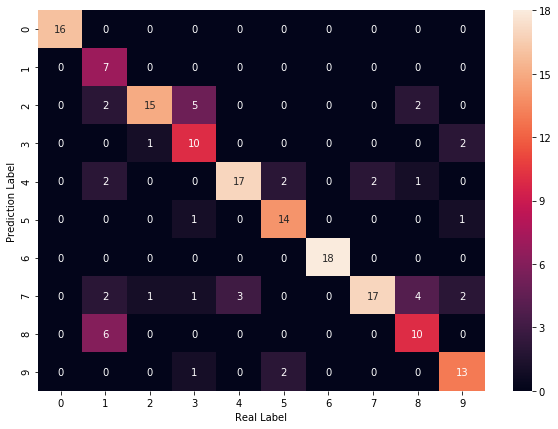

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:28 index:[5] real:5
#1 min_error:29 index:[3] real:2
#2 min_error:28 index:[7] real:8
#3 min_error:6 index:[0] real:0
#4 min_error:27 index:[1] real:1
#5 min_error:18 index:[7] real:7
#6 min_error:12 index:[6] real:6
#7 min_error:18 index:[3] real:3
#8 min_error:8 index:[2] real:2
#9 min_error:22 index:[1] real:1
#10 min_error:19 index:[7] real:7
#11 min_error:29 index:[7 8] real:4
#12 min_error:18 index:[6] real:6
#13 min_error:20 index:[3] real:3
#14 min_error:19 index:[1] real:1
#15 min_error:26 index:[3] real:3
#16 min_error:27 index:[7] real:9
#17 min_error:25 index:[1] real:1
#18 min_error:21 index:[7] real:7
#19 min_error:7 index:[6] real:6
#20 min_error:22 index:[8] real:8
#21 min_error:7 index:[4] real:4
#22 min_error:19 index:[3] real:3
#23 min_error:21 index:[1] real:1
#24 min_error:6 index:[4] real:4
#25 min_error:12 index:[0] real:0
#26 min_error:21 index:[5] real:5
#27 min_error:17 index:[3] real:3
#28 min_error:24 index:[6] real:6
#29 min_error:20 index:[3] 

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8676561533704391
Avg Base Learner:0.8070253555967841


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.3
Accuracy on training set: 0.3
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5166666666666667
Accuracy on training set: 0.5555555555555556
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.59444444

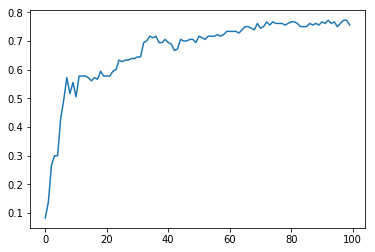

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.08333333333333333,
 0.1388888888888889,
 0.26666666666666666,
 0.3,
 0.3,
 0.42777777777777776,
 0.49444444444444446,
 0.5722222222222222,
 0.5166666666666667,
 0.5555555555555556,
 0.5055555555555555,
 0.5777777777777777,
 0.5777777777777777,
 0.5777777777777777,
 0.5722222222222222,
 0.5611111111111111,
 0.5722222222222222,
 0.5666666666666667,
 0.5944444444444444,
 0.5777777777777777,
 0.5777777777777777,
 0.5777777777777777,
 0.5944444444444444,
 0.6,
 0.6333333333333333,
 0.6277777777777778,
 0.6333333333333333,
 0.6333333333333333,
 0.6388888888888888,
 0.6388888888888888,
 0.6444444444444445,
 0.6444444444444445,
 0.6944444444444444,
 0.7,
 0.7166666666666667,
 0.7111111111111111,
 0.7166666666666667,
 0.6944444444444444,
 0.6944444444444444,
 0.7055555555555556,
 0.6944444444444444,
 0.6888888888888889,
 0.6666666666666666,
 0.6722222222222223,
 0.7055555555555556,
 0.7,
 0.7,
 0.7055555555555556,
 0.7055555555555556,
 0.6944444444444444,
 0.7166666666666667,
 0.711111111111